BloomTech Data Science

*Unit 2, Sprint 1, Module 3*

---

# Module Project: Ridge Regression

For this project, you'll return to the Tribecca Condo dataset. But this time, you'll look at the _entire_ dataset and try to predict property sale prices.

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two subset your dataset to one-family dwellings whose price is between \\$100,000 and \\$2,000,000.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `OneHotEncoder`, and transform `X_train` and `X_test`.
- **Task 7:** Build and train a `LinearRegression` model.
- **Task 8:** Build and train a `Ridge` model.
- **Task 9:** Calculate the training and test mean absolute error for your `LinearRegression` model.
- **Task 10:** Calculate the training and test mean absolute error for your `Ridge` model.
- **Task 11:** Create a horizontal bar chart showing the 10 most influencial features for your `Ridge` model.

**Note**

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [1]:
%%capture
!pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge

In [3]:
import pandas as pd

def wrangle(filepath):
    # Import csv file
    cols = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
            'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE', 'SALE DATE']
    df = pd.read_csv(filepath, usecols=cols,
                     parse_dates=['SALE DATE'],
                     index_col='SALE DATE',
                     dtype={'BOROUGH': 'object'})

    # Clean column headers
    df.columns = df.columns.str.lower().str.replace('-', ' ').str.replace(' ', '_')

    # Clean and convert 'sale price' column
    df['sale_price'] = df['sale_price'].str.replace('$', '').str.replace('-', '').str.replace(',', '').astype(int)

    # Subset dataframe to one family dwellings between 100k-2mil
    df = df[(df['building_class_category'] == '01 ONE FAMILY DWELLINGS') &
            (df['sale_price'] > 100_000) &
            (df['sale_price'] < 2_000_000)]

    return df.drop(columns='building_class_category')

# Filepath
filepath = "https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/condos/NYC_Citywide_Rolling_Calendar_Sales.csv"



In [4]:
#df.info()

**Task 1:** Use the above `wrangle` function to import the `NYC_Citywide_Rolling_Calendar_Sales.csv` file into a DataFrame named `df`.

In [5]:
df = wrangle(filepath)
df.head()

,borough,neighborhood,gross_square_feet,year_built,sale_price
SALE DATE,,,,,
2019-01-01,3,OCEAN PARKWAY-NORTH,1325.0,1930.0,550000
2019-01-01,4,QUEENS VILLAGE,2001.0,1940.0,200000
2019-01-02,2,PELHAM PARKWAY SOUTH,2043.0,1925.0,810000
2019-01-02,3,FLATBUSH-CENTRAL,2680.0,1899.0,125000
2019-01-02,3,FLATBUSH-EAST,1872.0,1940.0,620000


**Task 2:** Modify the above `wrangle` function so that:

- The column `'SALE DATE'` becomes the `DatetimeIndex`.
- The dtype for the `'BOROUGH'` column is `object`, not `int`.
- The dtype for the `'SALE PRICE'` column is `int`, not `object`.
- The dataset includes only one-family dwellings (`BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS'`).
- The dataset includes only properties whose sale price is between \\$100,000 and \\$2,000,000.

In [6]:
# Perform your exploratory data analysis here and
# modify the wrangle function above

# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'SALE_PRICE'`.

In [7]:
target = 'sale_price'
X = df.drop(columns=target)
y = df[target]

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from January to March 2019.
- Your test set should include data from April 2019.

In [8]:
cutoff = '2019-04-01'
mask = X.index < cutoff
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model.

In [9]:
from sklearn.metrics import mean_absolute_error

# Step 1: Calculate the mean of the target variable in the training set
mean_sale_price = y_train.mean()

# Step 2: Create baseline predictions
baseline_predictions = [mean_sale_price] * len(y_train)

# Step 3: Calculate the baseline MAE
baseline_mae = mean_absolute_error(y_train, baseline_predictions)

print('Sales price mean:', mean_sale_price)
print('Baseline MAE:', baseline_mae)

Sales price mean: 621573.7423214999
Baseline MAE: 214721.52773001452


# IV. Build Model

**Task 6:** Build and train a `OneHotEncoder` and then use it to transform `X_train` and `X_test`.

In [10]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder with the updated parameter name
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the training data and transform it
XT_train = ohe.fit_transform(X_train)

# Transform the test data
XT_test = ohe.transform(X_test)

**Task 7:** Build and train a `LinearRegression` model named `model_lr`. Remember to train your model using your _transformed_ feature matrix.

In [11]:
# Instantiate the LinearRegression model
model_lr = LinearRegression()

# Fit the model to the training data
model_lr.fit(XT_train, y_train)

LinearRegression()

**Task 8:** Build and train a `Ridge` model named `model_r`. Remember to train your model using your _transformed_ feature matrix.

In [12]:
from sklearn.linear_model import Ridge

# Instantiate the Ridge model with the name model_r
model_r = Ridge()

# Fit model_r to the transformed feature matrix and the target vector
model_r.fit(XT_train, y_train)

Ridge()

# V. Check Metrics

**Task 9:** Check the training and test metrics for `model_lr`.

In [13]:
from sklearn.metrics import mean_absolute_error

# Make predictions using the LinearRegression model on the training and test data
train_predictions_lr = model_lr.predict(XT_train)
test_predictions_lr = model_lr.predict(XT_test)

# Calculate MAE for the training and test sets
training_mae_lr = mean_absolute_error(y_train, train_predictions_lr)
test_mae_lr = mean_absolute_error(y_test, test_predictions_lr)

print('Linear Training MAE:', training_mae_lr)
print('Linear Test MAE:', test_mae_lr)

Linear Training MAE: 92095.18069405665
Linear Test MAE: 6.362087737310456e+16


**Task 10:** Check the training and test metrics for `model_r`.

In [14]:
from sklearn.metrics import mean_absolute_error

# Make predictions using the Ridge model on the training and test data
train_predictions_r = model_r.predict(XT_train)
test_predictions_r = model_r.predict(XT_test)

# Calculate MAE for the training and test sets
training_mae_r = mean_absolute_error(y_train, train_predictions_r)
test_mae_r = mean_absolute_error(y_test, test_predictions_r)

print('Ridge Training MAE:', training_mae_r)
print('Ridge Test MAE:', test_mae_r)

Ridge Training MAE: 99550.6561286169
Ridge Test MAE: 155681.28355187


**Stretch Goal:** Calculate the training and test $R^2$ scores `model_r`.

In [15]:
# Caculate R^2 score
from sklearn.metrics import r2_score

# Make predictions using the Ridge model on the training and test data
train_predictions_r = model_r.predict(XT_train)
test_predictions_r = model_r.predict(XT_test)

# Calculate R^2 score for the training and test sets
training_r2_r = r2_score(y_train, train_predictions_r)
test_r2_r = r2_score(y_test, test_predictions_r)

print('Ridge Training R^2:', training_r2_r)
print('Ridge Test R^2:', test_r2_r)

Ridge Training R^2: 0.7765825977743182
Ridge Test R^2: 0.3933463504909396


# IV. Communicate Results

**Task 11:** Create a horizontal barchart that plots the 10 most important coefficients for `model_r`, sorted by absolute value. Your figure should look like our example from class:

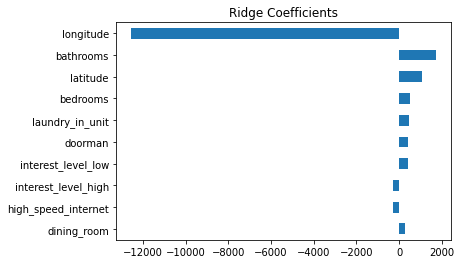

**Note:** Your figure shouldn't be identical to the one above. Your model will have different coefficients since it's been trained on different data. Only the formatting should be the same.

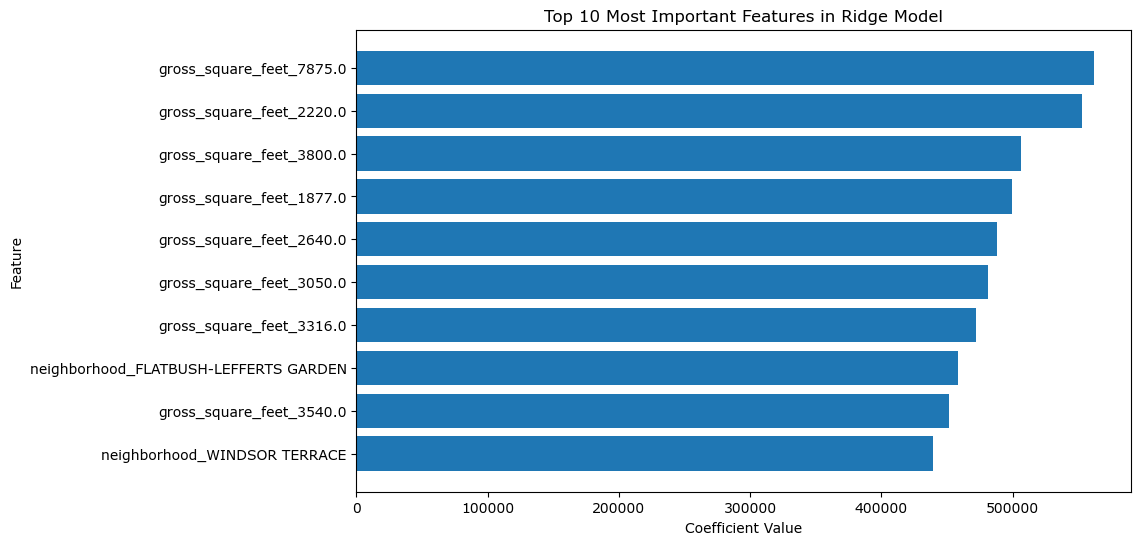

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Extract coefficients from the Ridge model
coefficients = model_r.coef_

# Retrieve the feature names from the OneHotEncoder
feature_names = ohe.get_feature_names_out()

# Pair coefficients with feature names and sort them by absolute value
feature_importance = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)

# Select the top 10 features and coefficients
top_features = feature_importance[:10]

# Separate the coefficients and feature names for plotting
values, names = zip(*top_features)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(names, values, align='center')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features in Ridge Model')
plt.gca().invert_yaxis()  # Display the highest value at the top
plt.show()